# Problem Statement: Concrete Strength Prediction

Objective 
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 85% to 95% accuracy.

Resources Available 
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

Steps and Tasks:
•	Exploratory data quality report reflecting the following:
1.	Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers
2.	Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes
3.	Strategies to address the different data challenges such as data pollution, outliers and missing values
4.	Feature Engineering techniques
a.	Identify opportunities (if any) to create a composite feature, drop a feature
b.	Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help
c.	Explore for Gaussians and comment on the distribution. Use pairplot or distplot to visualize the same.
•	Creating the model and tuning it
1.	Algorithms that you think will be suitable for this project.
2.	Techniques employed to squeeze that extra performance out of the model without making it over fit or under fit.
3.	Optional - Model performance range at 95% confidence level
¬


Attribute Information:

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.



Name -- Data Type -- Measurement -- Description
•	Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
•	Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
•	Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
•	Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
•	Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
•	Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
•	Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
•	Age(age) -- quantitative -- Day (1~365) -- Input Variable
•	Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable


In [129]:
#importing libraries
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
sns.set(style = 'darkgrid')
from IPython.display import HTML, display
from IPython.core import display as ICD
from pandas.plotting import scatter_matrix
pd.options.display.max_columns = None
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import warnings
import scikitplot as skplt
warnings.filterwarnings('ignore')

#import machine learning
from sklearn import model_selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



from sklearn.feature_extraction.text import CountVectorizer  
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system


warnings.filterwarnings("ignore")

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

# Load Data and Initial Analysis

In [130]:
ccs_df0 = pd.read_csv("concrete01.csv")
ccs_df0.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


#UOM for reference
#Cement = kg/m^3 
#Blast Furnace Slag = kg/m^3 
#Fly Ash = kg/m^3
#Water = kg/m^3
#Superplasticizer = kg/m^3
#Coarse Aggregate = kg/m^3
#Fine Aggregate = kg/m^3
#Age = day
#Concrete compressive strength = MPa

# Exploratory Data Analysis

In [131]:
ccs_df0.shape

(1030, 9)

In [132]:
ccs_df0.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [133]:
missing_values = ccs_df0.isnull().mean()*100

print("Concrete Compressive Strength dataset consists of {missing_values} missing values.".format(missing_values = missing_values.sum()))


Concrete Compressive Strength dataset consists of 0.0 missing values.


In [134]:
mean_values = ccs_df0.mean()

print("CCS dataset consists of these mean values:  {mean_values}".format(mean_values = mean_values))


CCS dataset consists of these mean values:  cement          281.167864
slag             73.895825
ash              54.188350
water           181.567282
superplastic      6.204660
coarseagg       972.918932
fineagg         773.580485
age              45.662136
strength         35.817961
dtype: float64


In [135]:
mode_value = ccs_df0['strength'].mode()

print("CCS dataset consists of this mode value for the target column - Strength:  {mode_value}".format(mode_value = mode_value))


CCS dataset consists of this mode value for the target column - Strength:  0    33.4
dtype: float64


In [136]:
median_values = ccs_df0.median()

print("CCS dataset consists of these median values:  {median_values}".format(median_values = median_values))

CCS dataset consists of these median values:  cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64


In [137]:
print("Data_quantile(25%):", ccs_df0.quantile(q=0.25)) 

Data_quantile(25%): cement          192.375
slag              0.000
ash               0.000
water           164.900
superplastic      0.000
coarseagg       932.000
fineagg         730.950
age               7.000
strength         23.710
Name: 0.25, dtype: float64


In [138]:
print("Data_quantile(50%):", ccs_df0.quantile(q=0.50)) 

Data_quantile(50%): cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
Name: 0.5, dtype: float64


In [139]:
print("Data_quantile(75%):", ccs_df0.quantile(q=0.75)) 

Data_quantile(75%): cement           350.000
slag             142.950
ash              118.300
water            192.000
superplastic      10.200
coarseagg       1029.400
fineagg          824.000
age               56.000
strength          46.135
Name: 0.75, dtype: float64


Mean:  35.81796116504854 
Median:  34.445 
Mode:  33.4


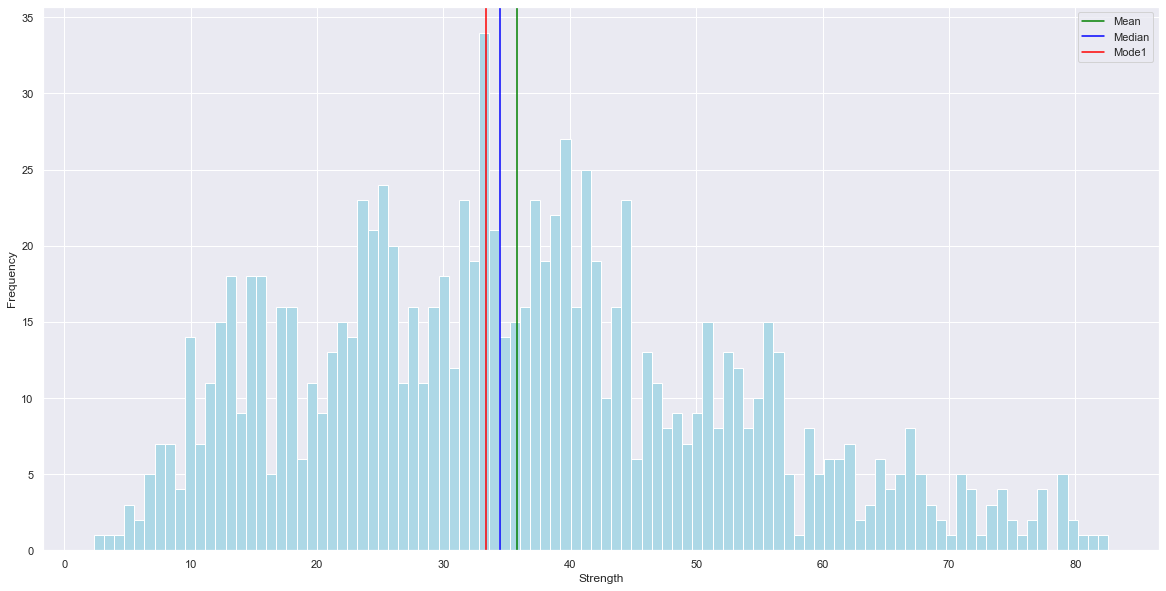

In [140]:
mean=ccs_df0['strength'].mean()
median=ccs_df0['strength'].median()
mode=ccs_df0['strength'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(20,10)) # set the figure size
plt.hist(ccs_df0['strength'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')

plt.xlabel('Strength')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()
warnings.filterwarnings('ignore')

In [141]:
ccs_df0.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [142]:
ccs_df0["cement"].quantile(0.75) - ccs_df0["cement"].quantile(0.25)

157.625

In [143]:
ccs_df0["slag"].quantile(0.75) - ccs_df0["slag"].quantile(0.25)

142.95

In [144]:
ccs_df0["ash"].quantile(0.75) - ccs_df0["ash"].quantile(0.25)

118.3

In [145]:
ccs_df0["water"].quantile(0.75) - ccs_df0["water"].quantile(0.25)

27.099999999999994

In [146]:
ccs_df0["superplastic"].quantile(0.75) - ccs_df0["superplastic"].quantile(0.25)

10.2

In [147]:
ccs_df0["coarseagg"].quantile(0.75) - ccs_df0["coarseagg"].quantile(0.25)

97.40000000000009

In [148]:
ccs_df0["fineagg"].quantile(0.75) - ccs_df0["fineagg"].quantile(0.25)

93.05000000000007

In [149]:
ccs_df0["age"].quantile(0.75) - ccs_df0["age"].quantile(0.25)

49.0

In [150]:
ccs_df0["strength"].quantile(0.75) - ccs_df0["strength"].quantile(0.25)

22.425000000000008

#cement, slag, ash, courseagg and fineagg display huge differences indicating possibility of outliers

Text(0.7, 555, 'IQR')

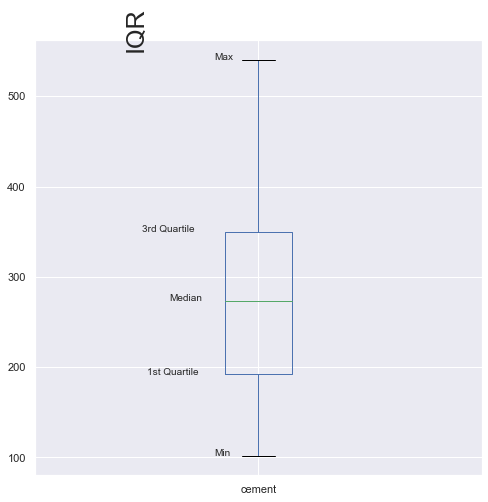

In [151]:
ccs_df0.boxplot(column="cement",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=350.00, s="3rd Quartile")
plt.text(x=0.8, y=273.00, s="Median")
plt.text(x=0.75, y=192.00, s="1st Quartile")
plt.text(x=0.9, y=102.00, s="Min")
plt.text(x=0.9, y=540.00, s="Max")
plt.text(x=0.7, y=555, s="IQR", rotation=90, size=25)

Text(0.7, 365, 'IQR')

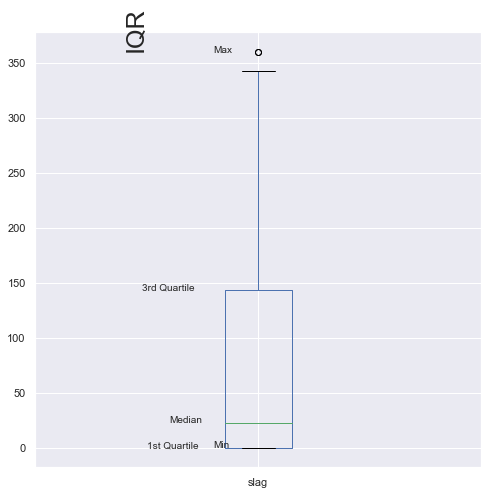

In [152]:
ccs_df0.boxplot(column="slag",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=143.00, s="3rd Quartile")
plt.text(x=0.8, y=23.00, s="Median")
plt.text(x=0.75, y=0.00, s="1st Quartile")
plt.text(x=0.9, y=0.00, s="Min")
plt.text(x=0.9, y=359.00, s="Max")
plt.text(x=0.7, y=365, s="IQR", rotation=90, size=25)

Text(0.7, 215, 'IQR')

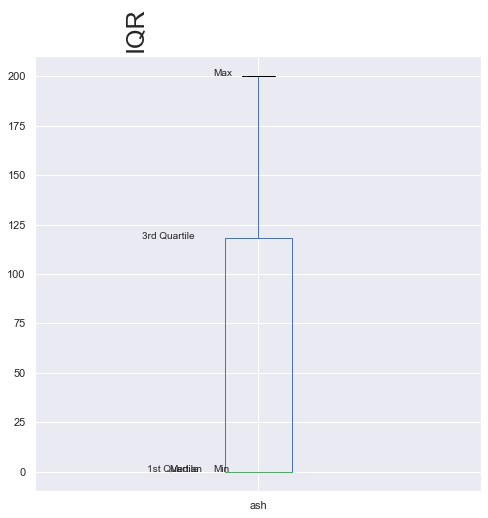

In [153]:
ccs_df0.boxplot(column="ash",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=118.00, s="3rd Quartile")
plt.text(x=0.8, y=0.00, s="Median")
plt.text(x=0.75, y=0.00, s="1st Quartile")
plt.text(x=0.9, y=0.00, s="Min")
plt.text(x=0.9, y=200.00, s="Max")
plt.text(x=0.7, y=215, s="IQR", rotation=90, size=25)

Text(0.7, 1170, 'IQR')

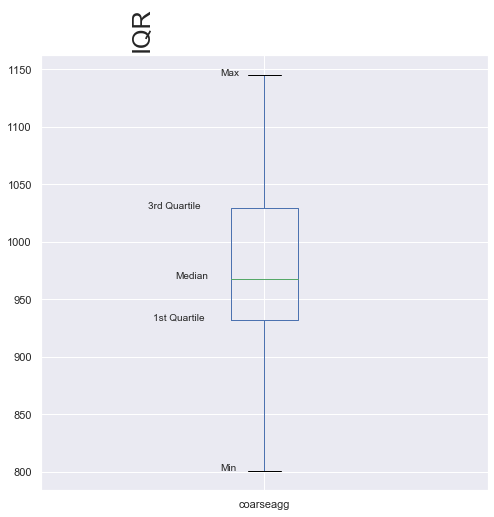

In [154]:
ccs_df0.boxplot(column="coarseagg",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=1029.00, s="3rd Quartile")
plt.text(x=0.8, y=968.00, s="Median")
plt.text(x=0.75, y=932.00, s="1st Quartile")
plt.text(x=0.9, y=801.00, s="Min")
plt.text(x=0.9, y=1145.00, s="Max")
plt.text(x=0.7, y=1170, s="IQR", rotation=90, size=25)

Text(0.7, 1000, 'IQR')

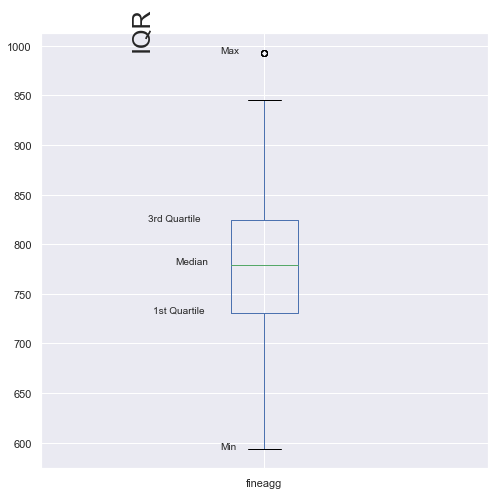

In [155]:
ccs_df0.boxplot(column="fineagg",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=824.00, s="3rd Quartile")
plt.text(x=0.8, y=780.00, s="Median")
plt.text(x=0.75, y=731.00, s="1st Quartile")
plt.text(x=0.9, y=594.00, s="Min")
plt.text(x=0.9, y=993.00, s="Max")
plt.text(x=0.7, y=1000, s="IQR", rotation=90, size=25)

#slag, ash and coarseagg have their median values closer to either 1st quartile or minimum values while both slag and fineagg have maximum values as outliers.   

Text(0.7, 90, 'IQR')

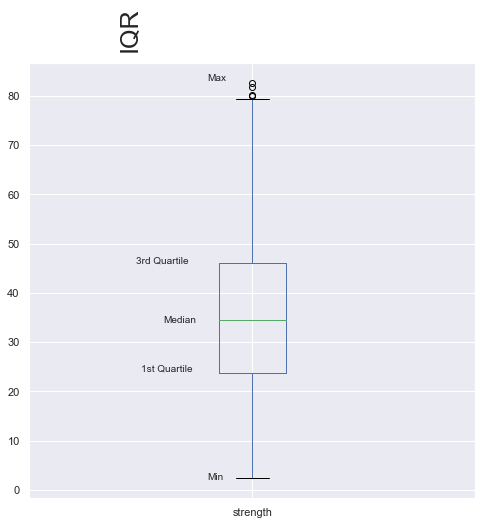

In [156]:
ccs_df0.boxplot(column="strength",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=46.00, s="3rd Quartile")
plt.text(x=0.8, y=34.00, s="Median")
plt.text(x=0.75, y=24.00, s="1st Quartile")
plt.text(x=0.9, y=2.00, s="Min")
plt.text(x=0.9, y=83.00, s="Max")
plt.text(x=0.7, y=90, s="IQR", rotation=90, size=25)

#Target column "strength" has many maximum values as outliers. Let's check the skewness below:

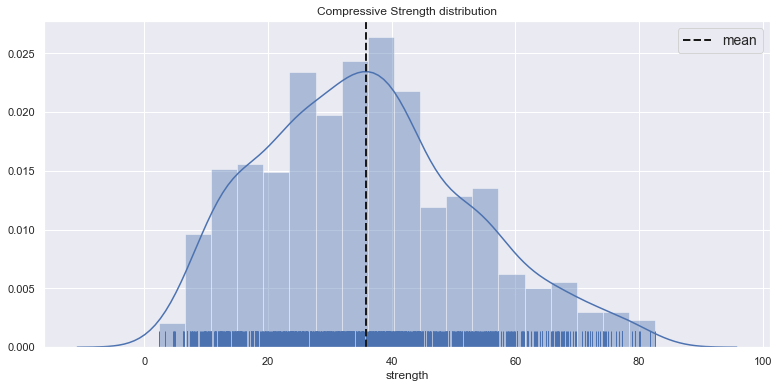

In [157]:
plt.figure(figsize=(13,6))
#using distplot() to draw a kernel density estimate line 
sns.distplot(ccs_df0["strength"],color="b",rug=True)
#axvline() to plot mean line 
plt.axvline(ccs_df0["strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressive Strength distribution")
plt.show()

#Most values lie below the 3rd quartile i.e. <46.1 MPa showing -ve skewness

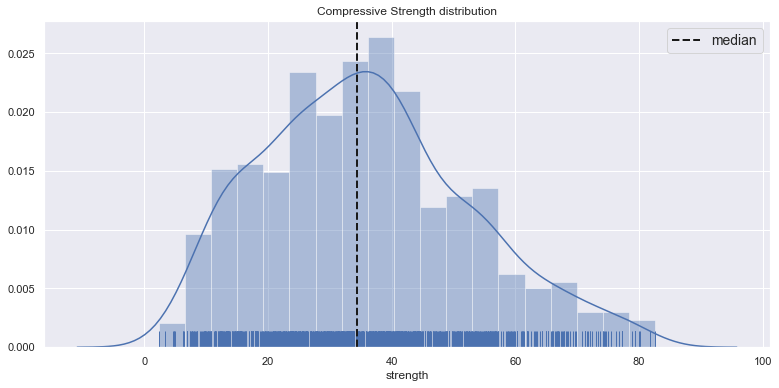

In [158]:
plt.figure(figsize=(13,6))
#using distplot() to draw a kernel density estimate line 
sns.distplot(ccs_df0["strength"],color="b",rug=True)
#axvline() to plot mean line 
plt.axvline(ccs_df0["strength"].median(),
            linestyle="dashed",color="k",
            label='median',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressive Strength distribution")
plt.show()

#Here, Mean>Median which shows +ve skewness

#Replacing outliers for Cement Compressive Strength with any other value will beat the purpose of the data analysis i.e. Develop a best fit model that gives an appropriate mixture with maximum compressive strength  

#Hence, replacing outliers with mean values only for other variables

In [159]:
#Replacing outliers with mean values for slag 

ccs_df4 = pd.read_csv("concrete01.csv")

mean_slag = ccs_df4["slag"].mean()
ccs_df4.loc[ccs_df4.slag>75,"slag"] = np.nan
ccs_df4.fillna(mean_slag, inplace = True)
ccs_df4

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,73.895825,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.200000,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.000000,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,73.895825,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,73.895825,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.000000,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.000000,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,73.895825,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.000000,0.0,228.0,0.0,932.0,670.0,270,55.06


In [160]:
ccs_df4.loc[ccs_df4.slag<1,"slag"] = np.nan
ccs_df4.fillna(mean_slag, inplace = True)
ccs_df4

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,73.895825,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.200000,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,73.895825,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,73.895825,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,73.895825,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,73.895825,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,73.895825,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,73.895825,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.000000,0.0,228.0,0.0,932.0,670.0,270,55.06


In [161]:
#Replacing outliers with mean values for fineagg 

mean_fineagg = ccs_df4["fineagg"].mean()

ccs_df4.loc[ccs_df4.fineagg>775,"fineagg"] = np.nan
ccs_df4.fillna(mean_fineagg, inplace = True)
ccs_df4

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,73.895825,0.0,203.5,0.0,971.8,748.500000,28,29.89
1,168.9,42.200000,124.3,158.3,10.8,1080.8,773.580485,14,23.51
2,250.0,73.895825,95.7,187.4,5.5,956.9,773.580485,28,29.22
3,266.0,73.895825,0.0,228.0,0.0,932.0,670.000000,28,45.85
4,154.8,73.895825,0.0,193.3,9.1,1047.4,696.700000,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,73.895825,166.0,180.0,10.0,961.0,773.580485,28,13.29
1026,531.3,73.895825,0.0,141.8,28.2,852.1,773.580485,3,41.30
1027,276.4,73.895825,90.3,179.6,8.9,870.1,768.300000,28,44.28
1028,342.0,38.000000,0.0,228.0,0.0,932.0,670.000000,270,55.06


In [162]:
ccs_df4.loc[ccs_df4.fineagg<1,"fineagg"] = np.nan
ccs_df4.fillna(mean_fineagg, inplace = True)
ccs_df4

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,73.895825,0.0,203.5,0.0,971.8,748.500000,28,29.89
1,168.9,42.200000,124.3,158.3,10.8,1080.8,773.580485,14,23.51
2,250.0,73.895825,95.7,187.4,5.5,956.9,773.580485,28,29.22
3,266.0,73.895825,0.0,228.0,0.0,932.0,670.000000,28,45.85
4,154.8,73.895825,0.0,193.3,9.1,1047.4,696.700000,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,73.895825,166.0,180.0,10.0,961.0,773.580485,28,13.29
1026,531.3,73.895825,0.0,141.8,28.2,852.1,773.580485,3,41.30
1027,276.4,73.895825,90.3,179.6,8.9,870.1,768.300000,28,44.28
1028,342.0,38.000000,0.0,228.0,0.0,932.0,670.000000,270,55.06


In [163]:
ccs_df4.cov() 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,10921.580220,-270.468039,-2658.299034,-182.073210,57.677098,-888.546203,-1451.838929,540.979608,869.143022
slag,-270.468039,203.093549,-288.620623,50.965359,-10.785014,116.106848,6.058944,33.978845,-24.935008
ash,-2658.299034,-288.620623,4095.616541,-351.195911,144.322455,-49.565280,535.447106,-624.071384,-113.064425
water,-182.073210,50.965359,-351.195911,456.002651,-83.879313,-302.675726,-479.609840,374.491462,-103.323253
superplastic,57.677098,-10.785014,144.322455,-83.879313,35.686781,-123.553888,56.376807,-72.718638,36.533734
coarseagg,-888.546203,116.106848,-49.565280,-302.675726,-123.553888,6045.677357,-205.438039,-14.813131,-214.239754
fineagg,-1451.838929,6.058944,535.447106,-479.609840,56.376807,-205.438039,2527.873700,-725.018238,-145.777467
age,540.979608,33.978845,-624.071384,374.491462,-72.718638,-14.813131,-725.018238,3990.437729,347.059758
strength,869.143022,-24.935008,-113.064425,-103.323253,36.533734,-214.239754,-145.777467,347.059758,279.081814


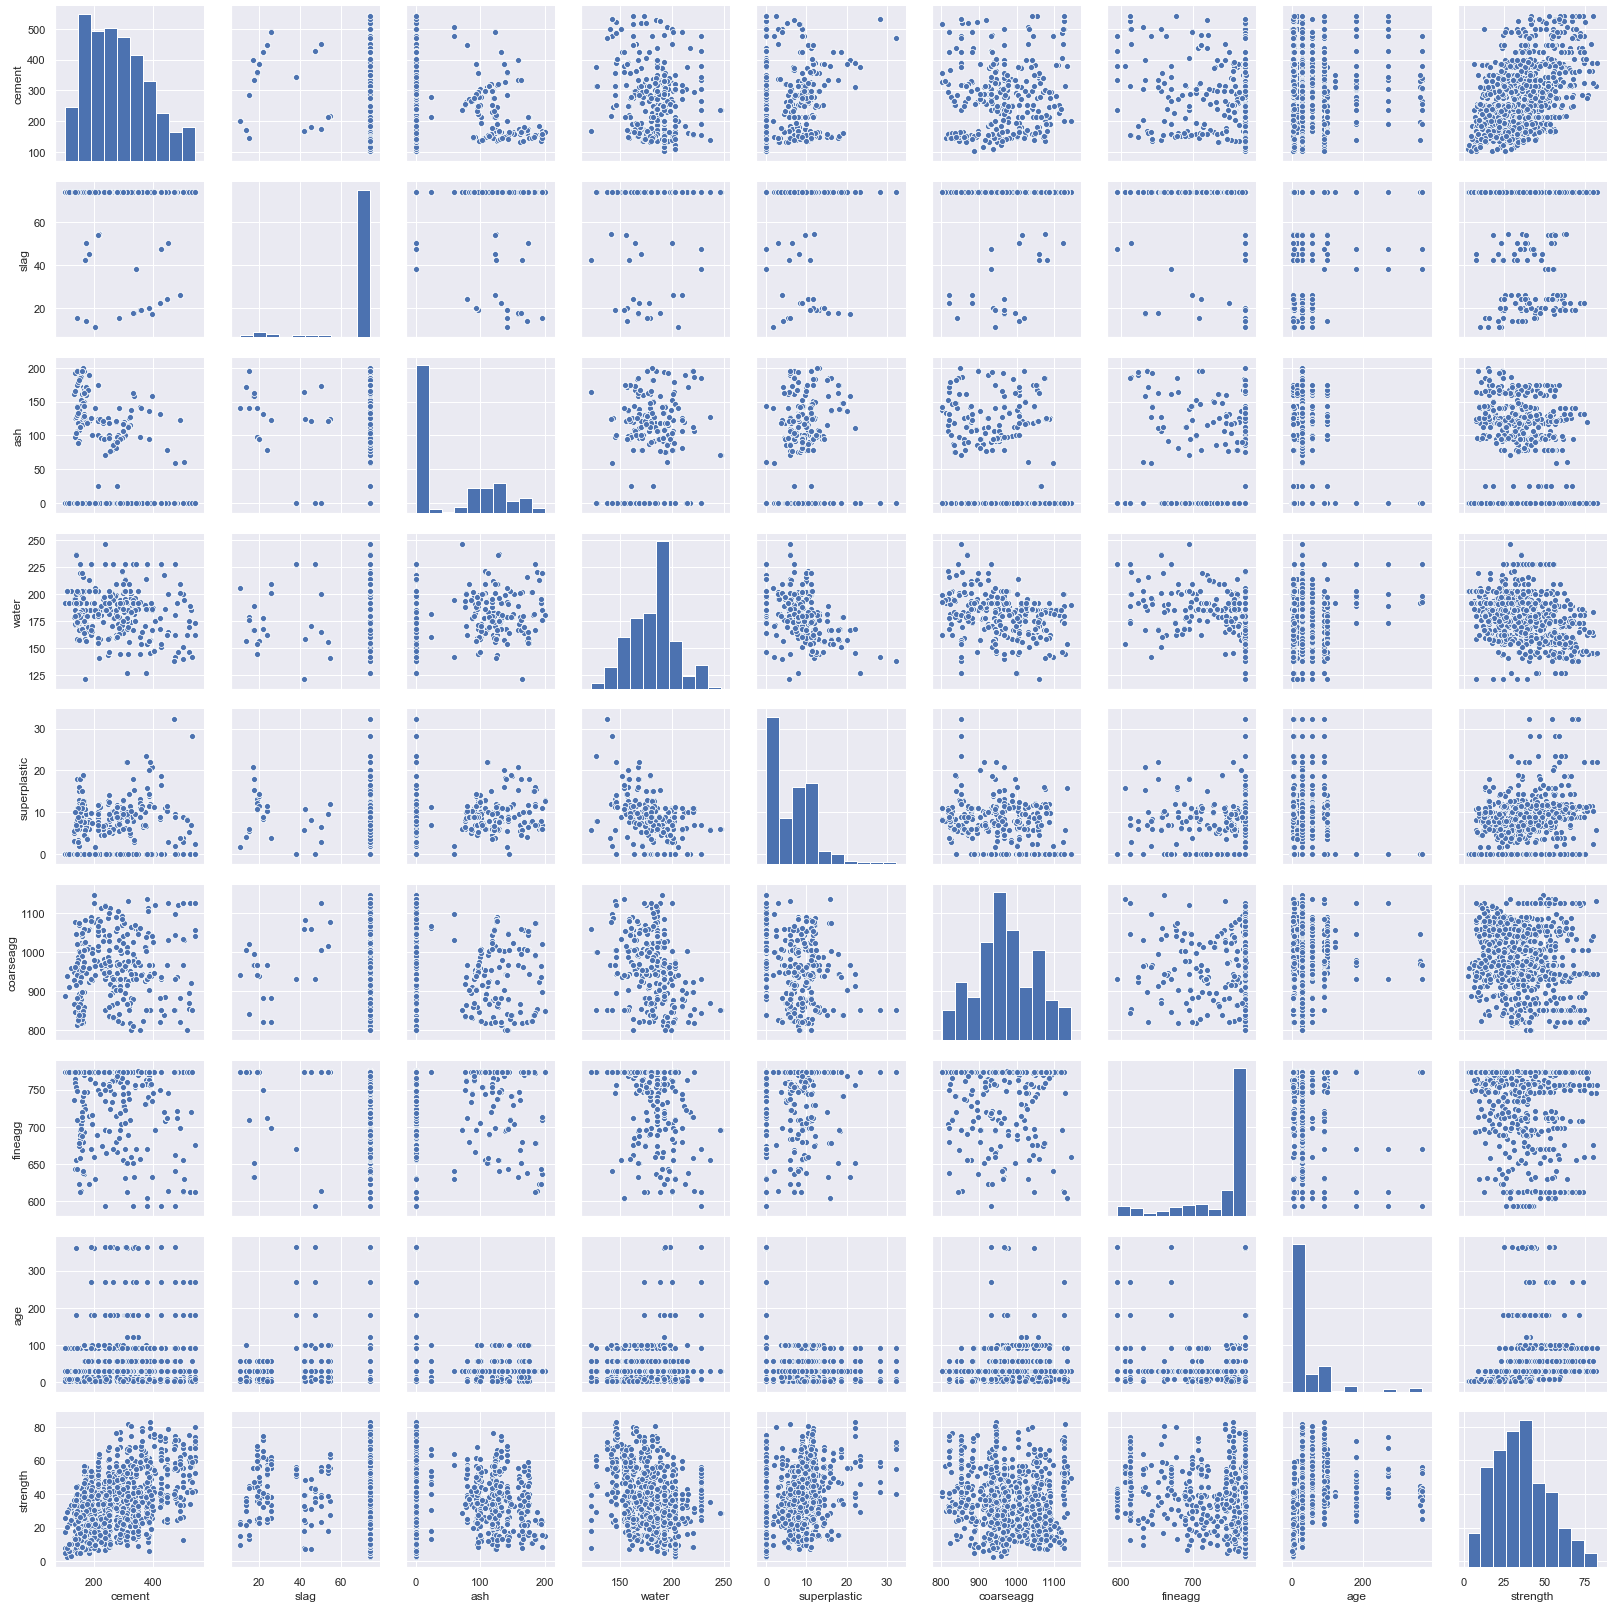

In [164]:
#Check correlation between all columns
sns.pairplot(ccs_df4)
plt.show()

#There seems to be no high correlation between variables. 

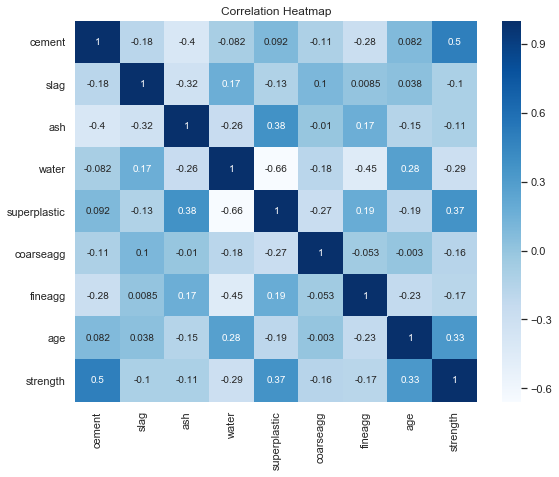

In [165]:
#Plotting the Pearson Correlation coefficients between the features.
corr = ccs_df4.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Correlation Heatmap")
plt.show()

#No high correlations found between Compressive strength and other features except for Cement.
#Age and Super Plasticizer are the only other features that are correlated with Compressive Strength.
#Age and Blast Furnace Slag seem to have positive correlation with Water.
#Super Plasticizer seems to have a negative high correlation with Water.
#Super Platicizer has positive correlations with Fly ash and Fine aggregate.

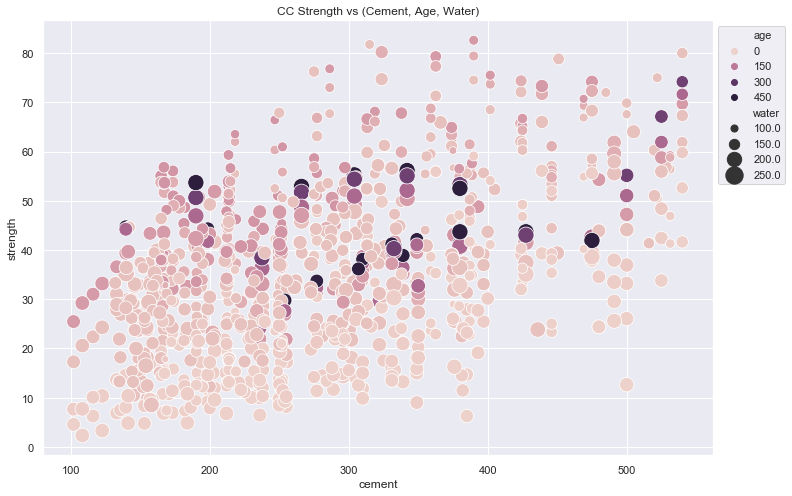

In [166]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(y="strength", x="cement", hue="age", size="water", data=ccs_df4, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#Compressive strength increases with amount of cement
#Compressive strength increases with age
#Cement with low age requires more water for higher strength
#Older the cement, more the water it requires
#Strength increases when less water is used in preparing it

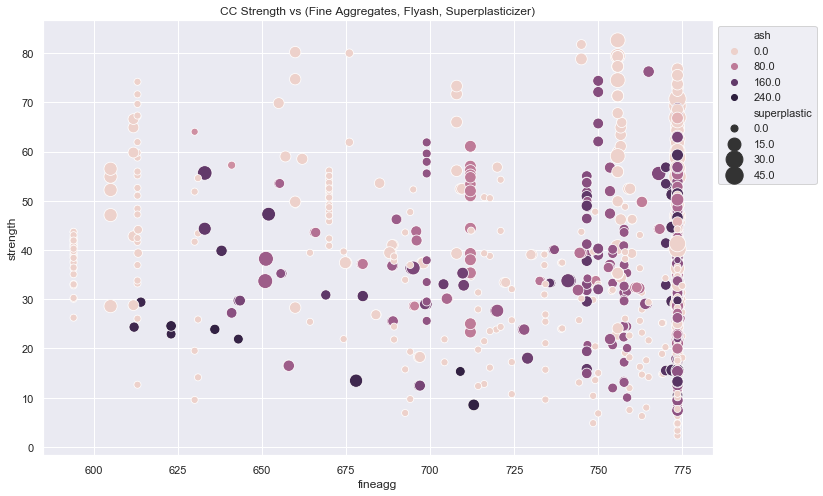

In [167]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(y="strength", x="fineagg", hue="ash", size="superplastic", data=ccs_df4, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine Aggregates, Flyash, Superplasticizer)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#As Flyash increases the compressive strength decreases
#Strength increases with addition of Superplasticizer

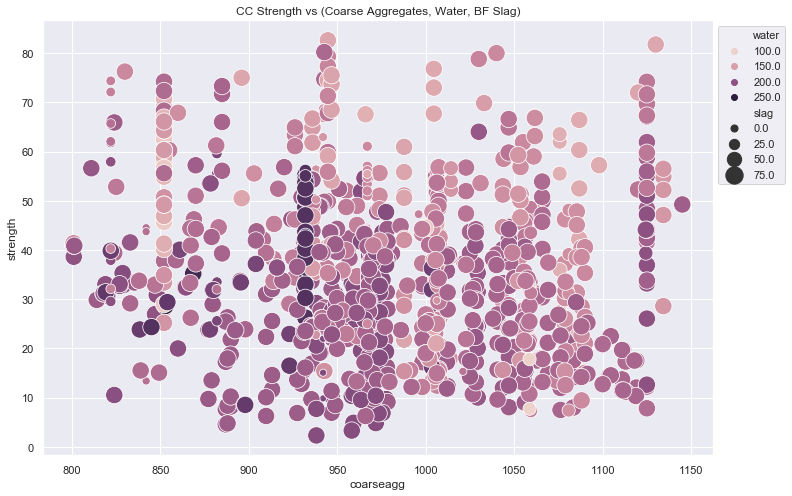

In [168]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(y="strength", x="coarseagg", hue="water", size="slag", data=ccs_df4, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Coarse Aggregates, Water, BF Slag)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#More of water leads to reduced strength
#Less of coarse aggregate alongwith less of slag increases strength

# Feature Engineering Techniques

In [169]:
#Seperating input variables from target column

X = ccs_df4.iloc[:,:-1]         # Features - All columns but last
Y = ccs_df4.iloc[:,-1]          # Target - Last Column

In [170]:
#Check for highly correlated variables

cor= ccs_df4.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.55) | (cor< -0.55)]

superplastic  water   -0.657533
dtype: float64

In [171]:
#Drop irrelavent data
ccs_df4=ccs_df4.drop(["superplastic","water"],axis=1)

In [172]:
ccs_df4.head(5)

,cement,slag,ash,coarseagg,fineagg,age,strength
0,141.3,73.895825,0.0,971.8,748.500000,28,29.89
1,168.9,42.200000,124.3,1080.8,773.580485,14,23.51
2,250.0,73.895825,95.7,956.9,773.580485,28,29.22
3,266.0,73.895825,0.0,932.0,670.000000,28,45.85
4,154.8,73.895825,0.0,1047.4,696.700000,28,18.29


In [173]:
req_col_names = ["Cem", "Sla", "Ash", "Wat", "Coa", "Fin", "Age", "CCS"]
curr_col_names = list(ccs_df4.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = ccs_df4.rename(columns=mapper)

In [174]:
#Split data in 3 datasets of train, test and validation set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((540, 8), (309, 8), (540,), (309,))

In [175]:
#Scale the data to reduce dimensions
#The scaler is fit on the training data and not on testing data to avoid loss of performance

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Try Linear model and check R-squared & Mean Square Error 

In [176]:
#X = ccs_df4[['strength']]
#Y = ccs_df4['cement']

In [177]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
# Train R^2
print(regression_model.score(X_train, Y_train))

0.5599110079457287


In [179]:
# Test R^2
print(regression_model.score(X_test, Y_test))

0.47740954248755546


In [180]:
# Train MSE
predictedCCS = regression_model.predict(X_train)
print(mean_squared_error(predictedCCS, Y_train))

122.27858733597448


In [181]:
# Test MSE
predictedCCS = regression_model.predict(X_test)
print(mean_squared_error(predictedCCS, Y_test))

141.13199037107498


In [182]:
poly = PolynomialFeatures( degree = 2, include_bias = False) 
xPoly_train = poly.fit_transform(X_train)
xPoly_train[0:2]

array([[ 0.508016  ,  0.33693953, -0.83887137,  0.51432401, -1.03151093,
        -0.50471974,  0.6024666 , -0.30295242,  0.25808026,  0.17117068,
        -0.42616008,  0.26128483, -0.52402406, -0.2564057 ,  0.30606267,
        -0.15390468,  0.11352825, -0.28264893,  0.17329609, -0.34755681,
        -0.17006003,  0.20299482, -0.10207665,  0.70370517, -0.43145169,
         0.86530498,  0.42339494, -0.50539198,  0.25413811,  0.26452919,
        -0.53053084, -0.25958948,  0.30986304, -0.1558157 ,  1.0640148 ,
         0.52062392, -0.62145088,  0.31249873,  0.25474201, -0.30407678,
         0.15290607,  0.36296601, -0.18251872,  0.09178017],
       [-1.02437033, -3.92973443,  1.89450498, -1.13434387, -0.35202114,
         0.48288022,  0.6024666 , -0.5150584 ,  1.04933458,  4.02550336,
        -1.94067469,  1.16198821,  0.36060001, -0.49464817, -0.61714891,
         0.52761054, 15.44281266, -7.44490142,  4.45767016,  1.38334957,
        -1.89759103, -2.36753374,  2.02404271,  3.5891491 , -2.

In [183]:
X.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,73.895825,0.0,203.5,0.0,971.8,748.500000,28
1,168.9,42.200000,124.3,158.3,10.8,1080.8,773.580485,14
2,250.0,73.895825,95.7,187.4,5.5,956.9,773.580485,28
3,266.0,73.895825,0.0,228.0,0.0,932.0,670.000000,28
4,154.8,73.895825,0.0,193.3,9.1,1047.4,696.700000,28


In [184]:
regression_modelP2 = regression_model.fit(xPoly_train, Y_train)

In [185]:
# Train R^2
print(regression_modelP2.score(xPoly_train, Y_train))

0.7930110148200638


In [186]:
poly = PolynomialFeatures( degree = 3, include_bias = False) 
xPoly_train = poly.fit_transform(X_train)
regression_modelPnew = regression_model.fit(xPoly_train, Y_train)
# Train R^2
print(regression_modelPnew.score(xPoly_train, Y_train))

0.9204592185096213


#Evaluate using K-fold cross validation

In [187]:
seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

In [188]:
model = LinearRegression()

In [189]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,73.895825,0.0,203.5,0.0,971.8,748.500000,28
1,168.9,42.200000,124.3,158.3,10.8,1080.8,773.580485,14
2,250.0,73.895825,95.7,187.4,5.5,956.9,773.580485,28
3,266.0,73.895825,0.0,228.0,0.0,932.0,670.000000,28
4,154.8,73.895825,0.0,193.3,9.1,1047.4,696.700000,28


In [190]:
results = model_selection.cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=kfold)
print("Results: %.2f (%.2f) MSE" % (-results.mean(), results.std()))

Results: 132.62 (29.79) MSE


#Feature Selection

In [193]:
X = ccs_df4.drop('strength', axis = 1)
Y = ccs_df4['strength']

In [194]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [195]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (721, 6) (721,)
Testing dataset shape: (309, 6) (309,)


In [196]:
X.shape

(1030, 6)

In [197]:
# Build Lin Reg  to use in feature selection
linR = LinearRegression()

In [198]:
# Build step forward feature selection
sfs1 = sfs(linR, k_features=5, forward=True, scoring='r2', cv=5)

In [199]:
# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [200]:
sfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.24694817, 0.22856441, 0.27317071, 0.29434551, 0.25412144]),
  'avg_score': 0.2594300484486841,
  'feature_names': ('0',),
  'ci_bound': 0.028994984256867754,
  'std_dev': 0.022559082806756264,
  'std_err': 0.011279541403378132},
 2: {'feature_idx': (0, 5),
  'cv_scores': array([0.33194745, 0.27938912, 0.36779303, 0.32374597, 0.32974924]),
  'avg_score': 0.32652496266153647,
  'feature_names': ('0', '5'),
  'ci_bound': 0.036227712104049646,
  'std_dev': 0.028186390791400583,
  'std_err': 0.014093195395700293},
 3: {'feature_idx': (0, 3, 5),
  'cv_scores': array([0.34842602, 0.31308068, 0.36367907, 0.3392604 , 0.3369562 ]),
  'avg_score': 0.34028047336901845,
  'feature_names': ('0', '3', '5'),
  'ci_bound': 0.021242437648315723,
  'std_dev': 0.016527338165814164,
  'std_err': 0.00826366908290708},
 4: {'feature_idx': (0, 2, 3, 5),
  'cv_scores': array([0.35739166, 0.31840049, 0.38785366, 0.34913733, 0.32347284]),
  'avg_score': 0.3472511

In [201]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

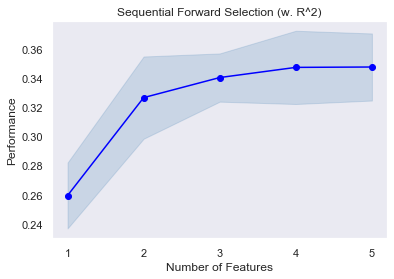

In [202]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [203]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 5]


In [204]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'coarseagg', 'age']


#Build Model on selected features

In [205]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [206]:
y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.358


In [207]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.368


#Linear Regression is not useful in this case, since the accuracy is pretty low

# Model Building

In [208]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [209]:
#Let's compare 3 different models

# Elasticnet Regression
elast = ElasticNet()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
elast.fit(X_train, Y_train)
lasso.fit(X_train, Y_train)
ridge.fit(X_train, Y_train)

# Making predictions on Test data
Y_pred_elast = elast.predict(X_test)
Y_pred_lasso = lasso.predict(X_test)
Y_pred_ridge = ridge.predict(X_test)

#Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score

In [210]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""ElasticNet      \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_elast)),mean_squared_error(Y_test, Y_pred_elast),
            mean_absolute_error(Y_test, Y_pred_elast), r2_score(Y_test, Y_pred_elast)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)),mean_squared_error(Y_test, Y_pred_lasso),
            mean_absolute_error(Y_test, Y_pred_lasso), r2_score(Y_test, Y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_ridge)),mean_squared_error(Y_test, Y_pred_ridge),
            mean_absolute_error(Y_test, Y_pred_ridge), r2_score(Y_test, Y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
ElasticNet      	 12.69 		 160.92 	10.08 		0.40
LassoRegression 	 12.41 		 154.00 	9.84 		0.43
RidgeRegression 	 11.88 		 141.18 	9.22 		0.48


#Performance is almost similar across the 3 algorithms. However, Ridge gives better results.

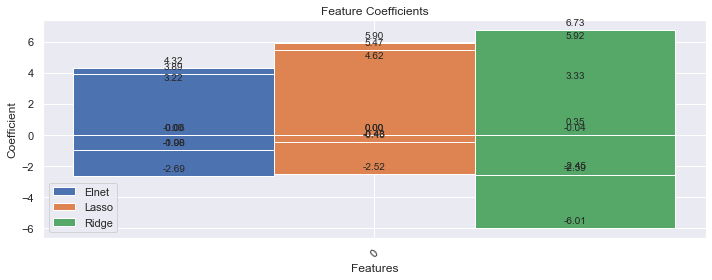

In [233]:
#Plotting coefficients 

coeff_elast = elast.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = np.arange(1)

X = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,4))
rects1 = ax.bar(X - 2*(width/2), coeff_elast, width, label='Elnet')
rects2 = ax.bar(X, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(X + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(X)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

#Check error in labels above

#ElasticNet keeps coefficients quite low, hence better than Lasso or Ridge Regression 

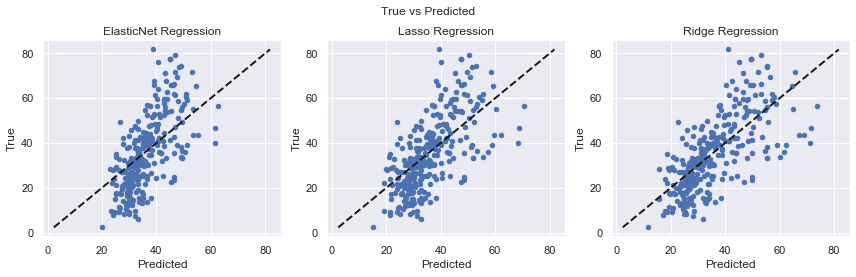

In [216]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(Y_pred_elast, Y_test, s=20)
ax1.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("ElasticNet Regression")

ax2.scatter(Y_pred_lasso, Y_test, s=20)
ax2.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(Y_pred_ridge, Y_test, s=20)
ax3.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

#Looking at the graphs between predicted and true values of the target variable, we can conclude that ElasticNet and Ridge Regression perform well as the predictions are closer to the actual values. 
#Lasso Regression is to be rejected just as Linear Regression.
#(The closer the points are to the black line, the less the error is.)

#We can use Decision Trees to improve model performance, since features distribution are loosely packed.  

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 7.52 		 56.61 		4.99 		0.79


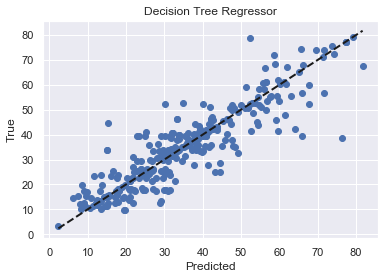

In [217]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

dtr.fit(X_train, Y_train)

Y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_dtr)),mean_squared_error(Y_test, Y_pred_dtr),
            mean_absolute_error(Y_test, Y_pred_dtr), r2_score(Y_test, Y_pred_dtr)))

plt.scatter(Y_test, Y_pred_dtr)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

#The Root Mean Squared Error (RMSE) has come down from 11.88 to 7.52, so the Decision Tree Regressor has improved the performance by a significant amount. 
#This can be observed in the plot since more points are closer to or on the line.

#Now, we can try Random Forest Regressor as it trains randomly initialized trees with random subsets of data sampled from the training data, this will make our model more robust.

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 6.20 		 38.50 		4.25 		0.86


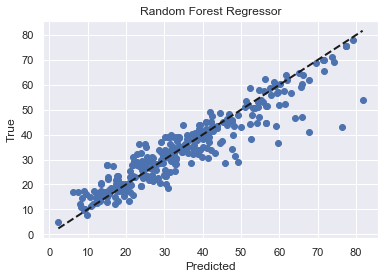

In [218]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, Y_train)

Y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_rfr)),mean_squared_error(Y_test, Y_pred_rfr),
            mean_absolute_error(Y_test, Y_pred_rfr), r2_score(Y_test, Y_pred_rfr)))

plt.scatter(Y_test, Y_pred_rfr)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

#The RMSE with Random Forest Regressor is now 6.20 by reduing the error via ensembling multiple trees.

#Feature importances for Decision Tree and Random Forest

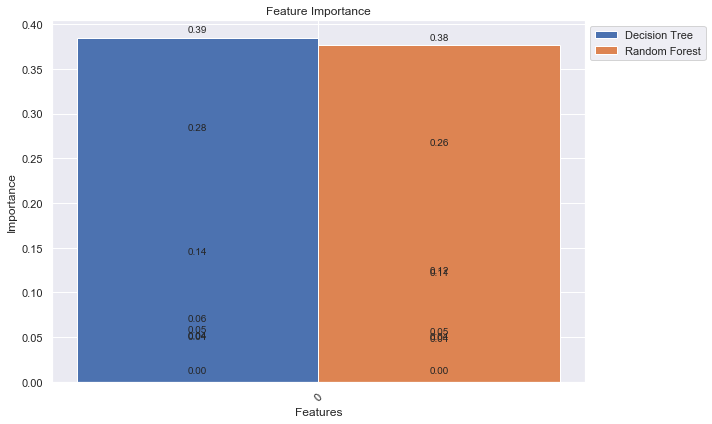

In [234]:
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_

labels = np.arange(1)

X = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(X -(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(X +(width/2), feature_rfr, width, label='Random Forest')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(X)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

#Check label error

#Cement and Age seem to be the most important features by tree based models. 
#Flyash, Coarse and Fine aggregates are least important factors.

#Result comparison for all models

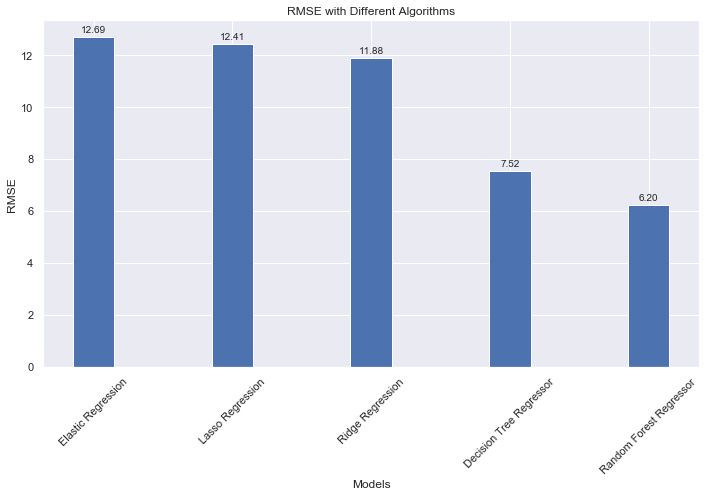

In [222]:
models = [elast, lasso, ridge, dtr, rfr]
names = ["Elastic Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(Y_test, model.predict(X_test))))

X = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(X, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(X)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

# Random Forest Regressor Model is the best choice for prediction of Concrete Compressive Strength

# Two points to be noted are:
#1 - Outliers from the target column "Concrete/Cement Compressive Strength" have not been dropped/replaced, since it would beat the basic purpose of building the model as far as real world application is concerned.
#2 - Linear Regression has been rejected even before model building due to very low accuracy score. Further, a concrete mixture doesn't follow a linear algorithm in practical sense.  